<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/RNN_FOR_DATA_PICTURE_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURED.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURED.zip
   creating: DATA_PICTURED/
   creating: DATA_PICTURED/picture_alpha/
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.3.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.4.csv  
  inflating: DATA_PICTURED/picture_alpha/alph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install visualkeras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURED"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture = []
      for index in range(len(df)) :
        value = df.iloc[index , 2 ]
        matrix_picture.append(value)

      matrix_picture = np.array(matrix_picture).reshape(16,3)
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_alpha
/content/DATA_PICTURED/picture_alpha/alpha_0.082_void_0.1.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.021_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.023_void_0.1.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.067_void_0.3.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.053_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.041_void_0.1.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.065_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.012_void_0.3.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.051_void_0.3.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.057_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.087_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.086_void_0.3.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.088_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.006_void_0.3.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.08_void_0.2.csv
/content/DATA_PICTURED/picture_alpha/alpha_0.008_void_0.3

In [ ]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      x.append(img)
      y.append(i)


In [ ]:
x = np.array(x).reshape(-1 , 16 , 3 , 1 )

In [ ]:
x.shape

(387, 16, 3, 1)

In [ ]:
TOTAL_X_vector = []
TOTAL_Y_vector = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector.append(picture[i + window_size])

TOTAL_X_vector_array = np.array(TOTAL_X_vector).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_array = np.array(TOTAL_Y_vector).reshape(-1 , 3 )


In [ ]:
TOTAL_X_vector_array.shape

(5418, 2, 3)

In [ ]:
TOTAL_Y_vector_array.shape

(5418, 3)

In [ ]:
# import matplotlib.colors
# rotated_data = np.rot90(picture_reshaped)
# img = plt.imshow(rotated_data ,  cmap='viridis'  )
# cbar = plt.colorbar(img,)
# cbar.set_label('Intensity Value', fontsize=12)
# plt.title('Image value z of a sample picture Health blade')
# plt.show()
# print(x[0][ : , : , 0 ])

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_vector_array,TOTAL_Y_vector_array , test_size=0.3 , random_state = 42 )

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 64 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(32, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,587 (76.51 KB)

 Trainable params: 19,587 (76.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
95/95 - 4s - 46ms/step - loss: 0.9902 - mse: 0.9902 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 2/100
95/95 - 1s - 6ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 3/100
95/95 - 0s - 5ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
95/95 - 1s - 6ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 5/100
95/95 - 1s - 7ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 6/100
95/95 - 0s - 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 7/100
95/95 - 1s - 6ms/step - loss: 0.0415 - mse: 0.0415 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 8/100
95/95 - 0s - 5ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 9/100
95/95 - 1s - 7ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 10/100
95/95 - 1s - 7ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0189 - val_mse: 0.018

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


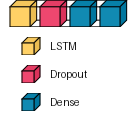

In [ ]:
visualkeras.layered_view(model, legend=True )

In [ ]:
x_train.shape

(3792, 2, 3)

In [ ]:
y_pre_for_total_x_train = model.predict(x_train)

  1/119 ━━━━━━━━━━━━━━━━━━━━ 34s 289ms/step

In [ ]:
y_test.shape

(1626, 3)

In [ ]:
y_pre_for_total_x_train.shape

(3792, 3)

In [ ]:
for index in range(len(y_train)):
  print(y_train[index])
  print(y_pre_for_total_x_train[index])
  print(" ******** ------- ******* ")
  if index > 10 :
    break

[0.69334161 0.64849621 0.61734675]
[0.7137145 0.7137603 0.712282 ]
 ******** ------- ******* 
[0.46791364 0.43559651 0.51014248]
[0.45692968 0.45447558 0.45459962]
 ******** ------- ******* 
[0.05908135 0.07321999 0.07235726]
[0.09208822 0.09371273 0.09157096]
 ******** ------- ******* 
[2.90018593 2.71927377 2.84604899]
[2.7969177 2.7847314 2.783024 ]
 ******** ------- ******* 
[0.45786611 0.46303261 0.49659134]
[0.48471692 0.48440957 0.484859  ]
 ******** ------- ******* 
[0.16712401 0.18195721 0.17949898]
[0.20762786 0.20624821 0.20007606]
 ******** ------- ******* 
[1.7735541  1.74386078 1.86948694]
[1.8526384 1.8447752 1.8397549]
 ******** ------- ******* 
[2.65536869 2.68994907 2.72163628]
[2.8436458 2.8336217 2.8300498]
 ******** ------- ******* 
[0.52303194 0.55489155 0.39661693]
[0.4735743  0.46818423 0.4690029 ]
 ******** ------- ******* 
[0.28357449 0.40599437 0.34715255]
[0.29654512 0.2954322  0.29344192]
 ******** ------- ******* 
[0.14443683 0.13188071 0.13965113]
[0.1478

In [ ]:
y_predict = model.predict(x_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_predict.shape

(1626, 3)

In [ ]:
y_test.shape

(1626, 3)

In [ ]:
t = []
t.append(x_test[0])
t = np.array(t)
y_t = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
t.shape

(1, 2, 3)

In [ ]:
y_test[0]

array([3.33892025, 3.38807501, 3.41683897])

In [ ]:
y_t

array([[3.4265516, 3.4492154, 3.4100804]], dtype=float32)

In [ ]:
r = 0
TOTAL_MSE_HEALTH_TRAIN  = []
for picture in x[::2] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Prediction Picture')

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('Main Picture')

  # plt.show()
  ###------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_HEALTH_TRAIN.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

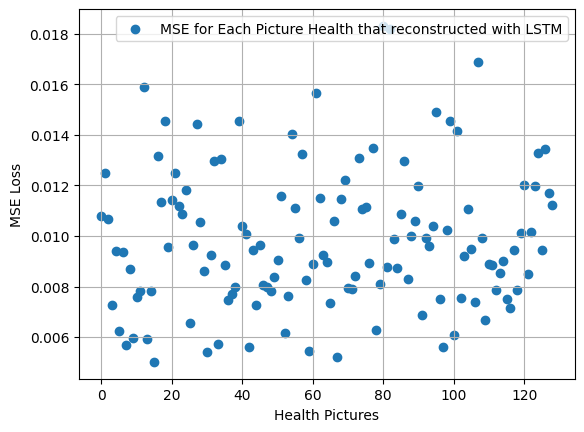

In [ ]:
plt.scatter(range(len(TOTAL_MSE_HEALTH_TRAIN)) , TOTAL_MSE_HEALTH_TRAIN , label="MSE for Each Picture Health that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Health Pictures")
plt.grid()
plt.show()

In [ ]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      x.append(img)
      y.append(i)

x = np.array(x).reshape(-1 , 16 , 3 , 1 )

TOTAL_X_vector_alpha = []
TOTAL_Y_vector_alpha = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_alpha.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_alpha.append(picture[i + window_size])

TOTAL_X_vector_alpha_array = np.array(TOTAL_X_vector_alpha).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_alpha_array = np.array(TOTAL_Y_vector_alpha).reshape(-1 , 3 )

r = 0
TOTAL_MSE_alpha   = []
for picture in x[::2] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted Health by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image Health given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_alpha.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [ ]:
plt.scatter(range(len(TOTAL_MSE_alpha)) , TOTAL_MSE_alpha , label="MSE for Each Picture alpha that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Alpha Category Blade Picture")
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


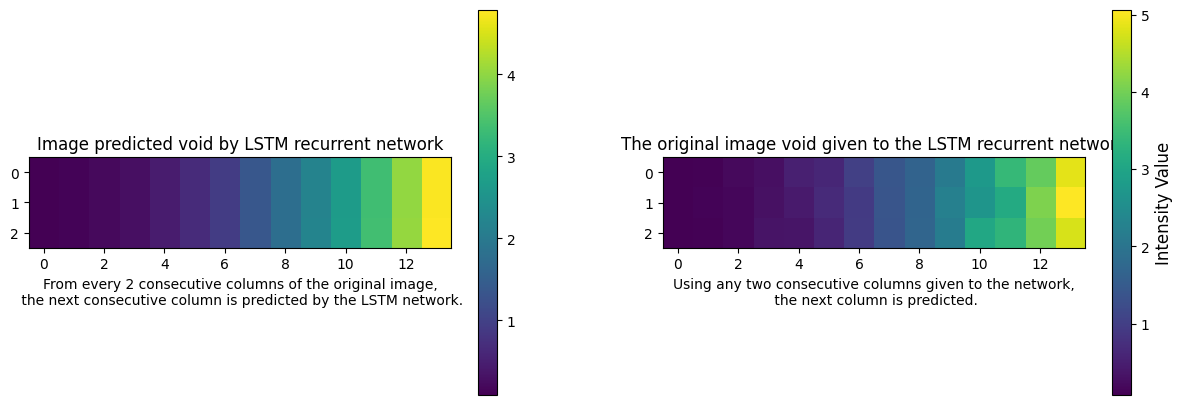

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


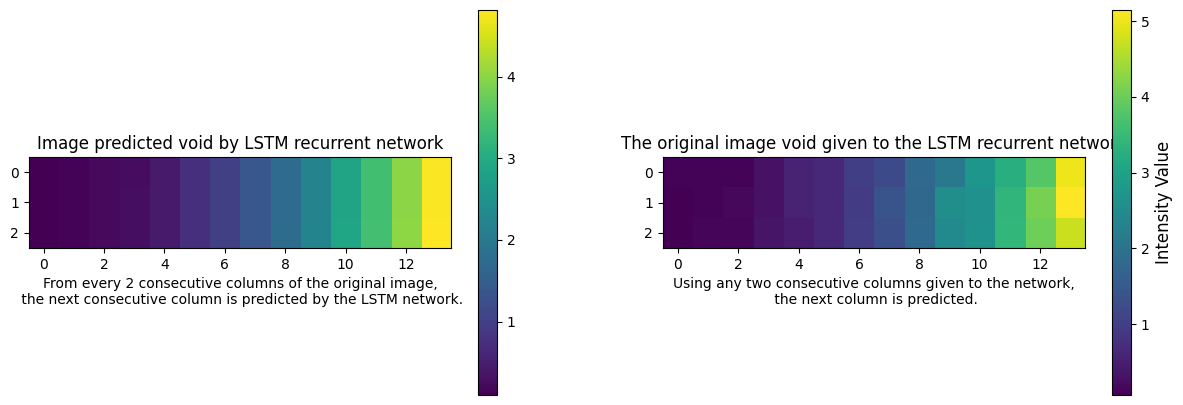

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


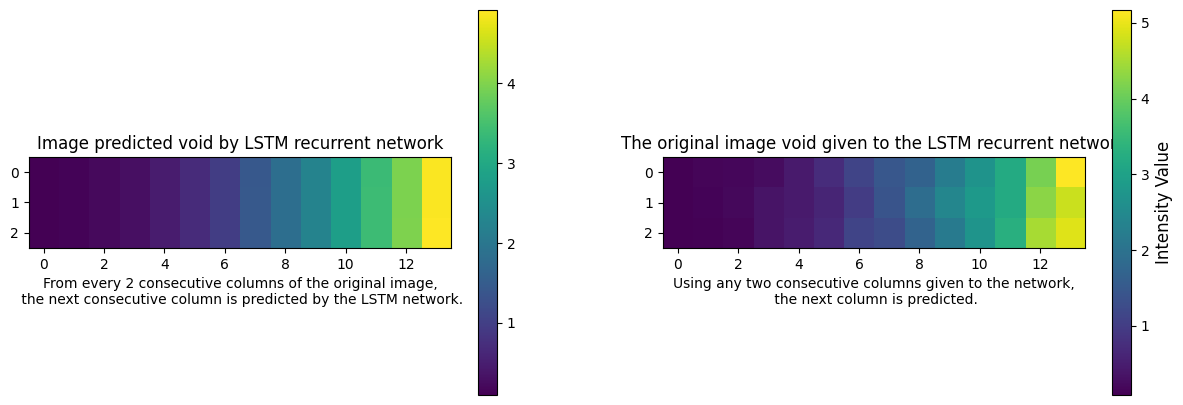

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Exception ignored in: <function _xla_gc_callback at 0x7bf500553600>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


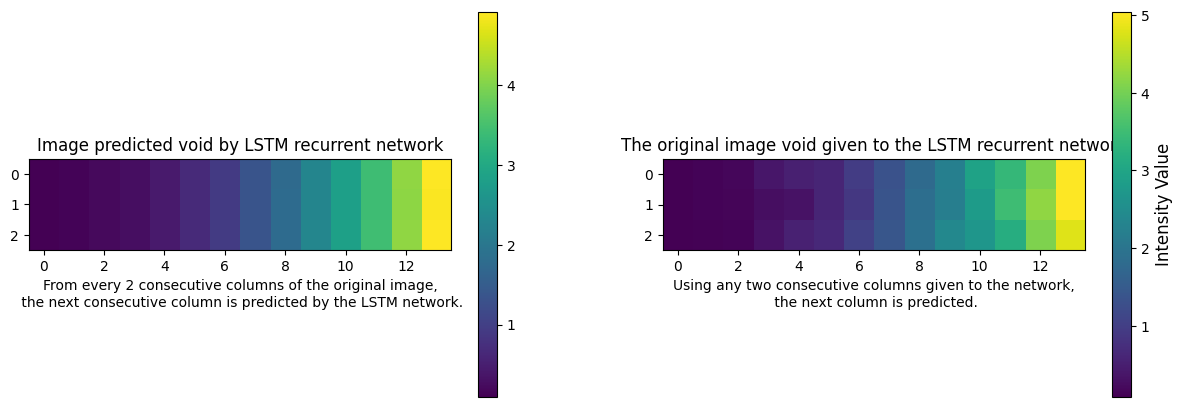

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


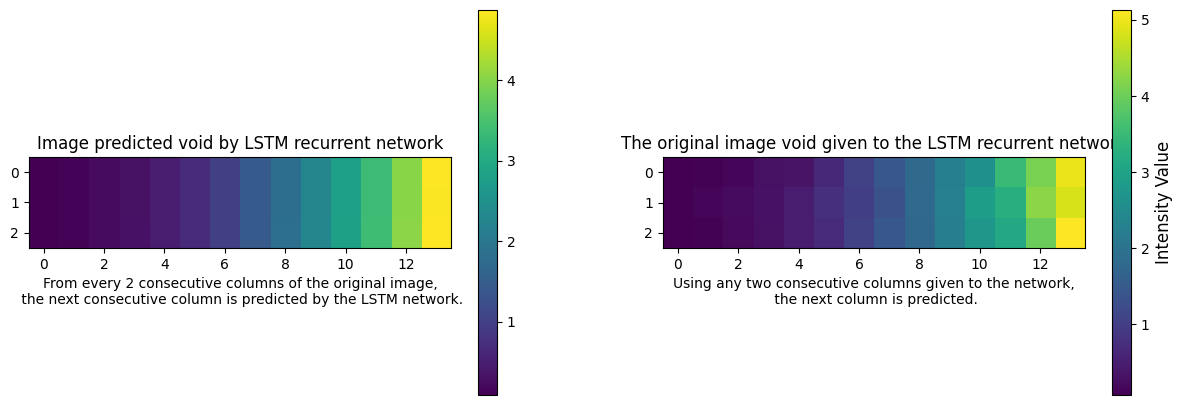

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


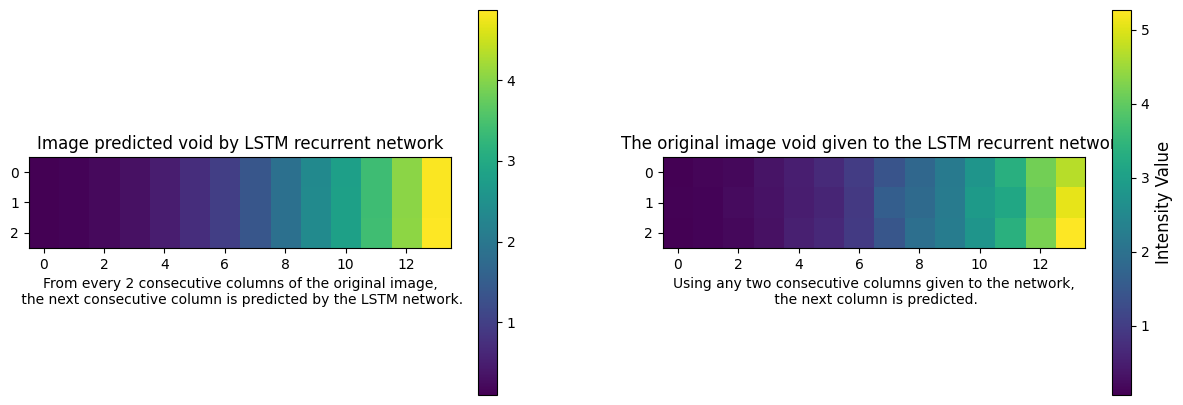

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


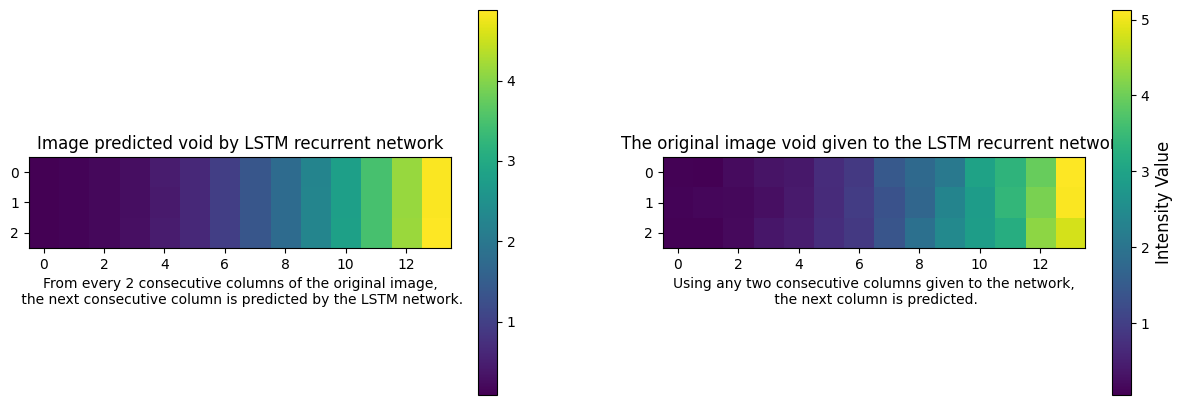

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


KeyboardInterrupt: 

In [76]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void' :
      x.append(img)
      y.append(i)

x = np.array(x).reshape(-1 , 16 , 3 , 1 )

TOTAL_X_vector_void = []
TOTAL_Y_vector_void = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_void.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_void.append(picture[i + window_size])

TOTAL_X_vector_void_array = np.array(TOTAL_X_vector_void).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_void_array = np.array(TOTAL_Y_vector_void).reshape(-1 , 3 )

r = 0
TOTAL_MSE_void   = []
for picture in x[::2] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  fig = plt.figure(figsize = (15 , 5 ) )
  ax1 = fig.add_subplot(1 , 2 , 1 )
  ax2 = fig.add_subplot(1 , 2 , 2 )
  rotated_data = np.rot90(total_y_pre)
  img = ax1.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax1.set_title('Image predicted void by LSTM recurrent network')
  ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  rotated_data = np.rot90(new_sample_y_array)
  img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  cbar = plt.colorbar(img,)
  cbar.set_label('Intensity Value', fontsize=12)
  ax2.set_title('The original image void given to the LSTM recurrent network')
  ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_void.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



In [79]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void_alpha' :
      x.append(img)
      y.append(i)

x = np.array(x).reshape(-1 , 16 , 3 , 1 )

TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_void.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_void.append(picture[i + window_size])

TOTAL_X_vector_void_alpha_array = np.array(TOTAL_X_vector_void_alpha).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_void_alpha_array = np.array(TOTAL_Y_vector_void_alpha).reshape(-1 , 3 )

r = 0
TOTAL_MSE_void_alpha   = []
for picture in x[::2] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted void-alpha by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image void-alpha given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += diff[index_2] ** 2

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_void_alpha.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

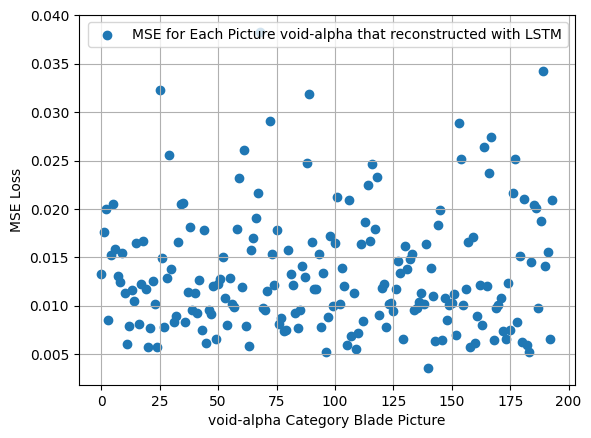

In [81]:
plt.scatter(range(len(TOTAL_MSE_void_alpha)) , TOTAL_MSE_void_alpha , label="MSE for Each Picture void-alpha that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("void-alpha Category Blade Picture")
plt.grid()
plt.show()

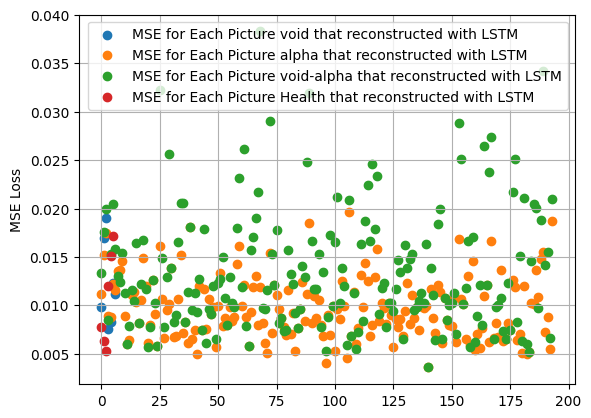

In [83]:
plt.scatter(range(len(TOTAL_MSE_void)) , TOTAL_MSE_void , label="MSE for Each Picture void that reconstructed with LSTM")
plt.scatter(range(len(TOTAL_MSE_alpha)) , TOTAL_MSE_alpha , label="MSE for Each Picture alpha that reconstructed with LSTM")
plt.scatter(range(len(TOTAL_MSE_void_alpha)) , TOTAL_MSE_void_alpha , label="MSE for Each Picture void-alpha that reconstructed with LSTM")
plt.scatter(range(len(TOTAL_MSE_HEALTH_TRAIN)) , TOTAL_MSE_HEALTH_TRAIN , label="MSE for Each Picture Health that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.grid()
plt.show()

In [ ]:
new_sample_y_array.shape

(14, 3)

In [ ]:
new_sample_x_array.shape

(14, 2, 3)

In [ ]:
total_y_pre = []
for i in new_sample_x_array :
  t=[]
  t.append(i)
  t = np.array(t)
  y_pre = model.predict(t)
  y_pre = y_pre.tolist()
  total_y_pre.append(y_pre[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
total_y_pre = np.array(total_y_pre)

In [ ]:
total_y_pre.shape

(14, 3)

In [ ]:
total_y_pre

array([[0.08820276, 0.08411194, 0.09013408],
       [0.15143397, 0.14620629, 0.15127295],
       [0.22261724, 0.21776029, 0.2224533 ],
       [0.29768646, 0.29201984, 0.29656166],
       [0.47083747, 0.46391752, 0.46596825],
       [0.75800079, 0.7467711 , 0.74421543],
       [1.01011038, 0.99716938, 0.99219102],
       [1.35388827, 1.33632982, 1.3303386 ],
       [1.70006573, 1.68342733, 1.68268132],
       [2.21103334, 2.18914843, 2.19240522],
       [2.81102276, 2.78247046, 2.78905106],
       [3.43568087, 3.39456749, 3.40399551],
       [4.05242348, 4.00021553, 4.0059886 ],
       [4.90769577, 4.83225203, 4.840837  ]])

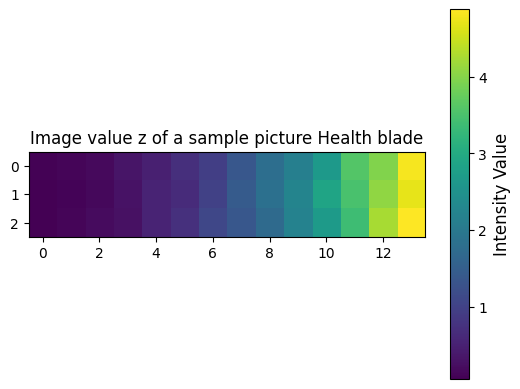

In [ ]:
rotated_data = np.rot90(new_sample_y_array)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()

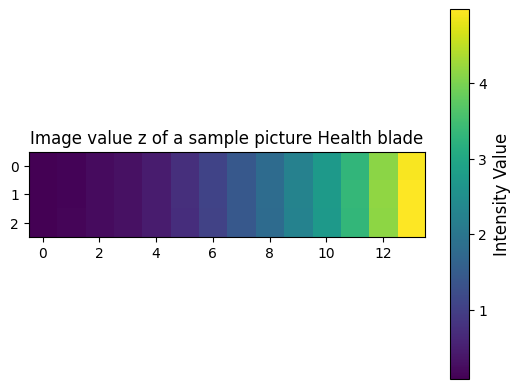

In [ ]:
rotated_data = np.rot90(total_y_pre)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()
